LINEAR REGRESSION - PART 1
(using Mobile Price Prediction dataset)

1. Import Library

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

2. Loading and describing the Dataset

In [22]:
dataset = pd.read_csv("Mobile_Price_Prediction_data.csv")

In [23]:
print(dataset.head())

   Screen Size (inches)  RAM (GB)  Storage (GB)  Battery Capacity (mAh)  \
0                   6.2         4            64                    4000   
1                   6.1         3           128                    3110   
2                   6.5         6           256                    4500   
3                   6.7         8           128                    4300   
4                   6.4         6           128                    4200   

   Camera Quality (MP)  Price ($)  
0                   48        500  
1                   12        800  
2                   64        600  
3                   48        700  
4                   40        550  


In [24]:
print(dataset.describe())

       Screen Size (inches)    RAM (GB)  Storage (GB)  Battery Capacity (mAh)  \
count            292.000000  292.000000    292.000000              292.000000   
mean               6.346575    5.592466    137.205479             4063.253425   
std                0.245416    1.658575     70.733994              551.790772   
min                5.700000    3.000000     32.000000             3000.000000   
25%                6.100000    4.000000     64.000000             3700.000000   
50%                6.400000    6.000000    128.000000             4200.000000   
75%                6.500000    6.000000    128.000000             4500.000000   
max                6.900000    8.000000    256.000000             5000.000000   

       Camera Quality (MP)   Price ($)  
count           292.000000  292.000000  
mean             37.808219  624.828767  
std              18.314291  132.611769  
min              12.000000  400.000000  
25%              20.000000  550.000000  
50%              40.0000

3. Visualizing the columns of the dataset

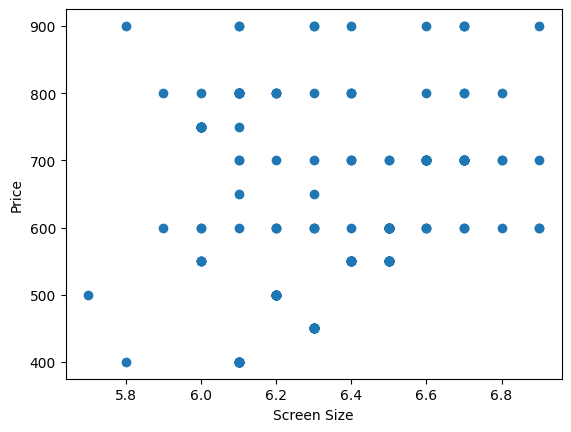

In [25]:
plt.scatter(dataset['Screen Size (inches)'], dataset['Price ($)'])
plt.xlabel('Screen Size')
plt.ylabel('Price')
plt.show()

IMPLEMENTING LINEAR REGRESSION
* In linear regression, our aim is to predict outcomes by fitting a straight line to our dataset.
* To evaluate the accuracy of our predictions, we use cost/loss function, evaluating the difference between predicted and actual values.
* Here goal is to minimize this cost/loss function, representing the error.
* To achieve the minimum value we go for gradient descent algorithm.
* This algorithm iteratively adjusts parameters to decrease the cost/loss function.
* Through successive iterations, the algorithm converges towards a local minimum, optimizing our model.

4. Loss function and Gradient decent function

--> Here for calculating loss difference between predicted and target y values - MSE(Mean Square Error) used to do this

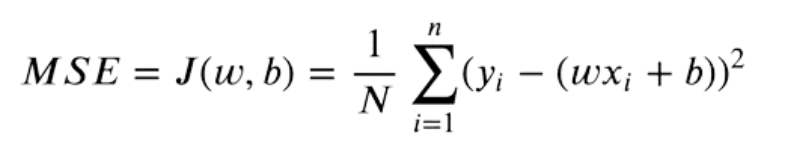

--> Here given gradients, we optimize our weights

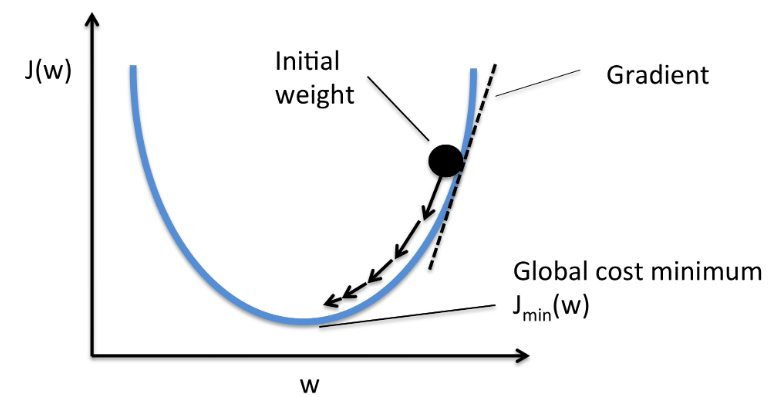

--> Here this is optimization equations where alpha is learning rate (l_r) which controls the incremental steps 

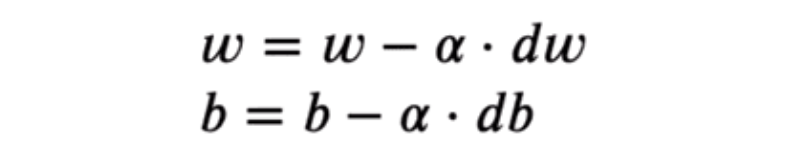

--> Here the aim is to minimize loss function, we get minimum loss function when gradients are zero, achieved by optimizing weights and biases through partial derivatives of the Mean Squared Error (MSE) function.

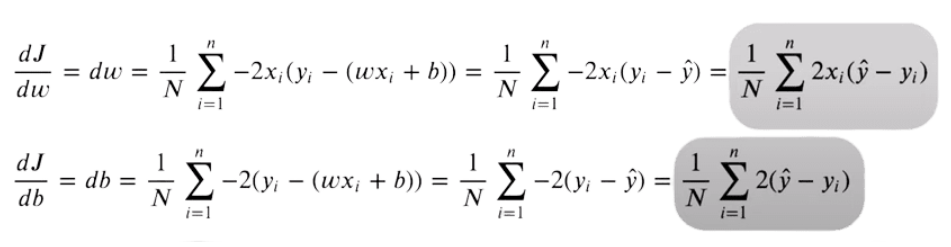


In [56]:
# we implement only gradient function 
# (on using derivation we get w_gradient and b_gradient so loss function implementation is not necessary)
def loss_function(x, y, n, w, b):
    total_error = 0
    for i in range(n-1):
        xi= x[i]
        yi= y[i]
        total_error += (yi - (w * xi + b)) ** 2
    total_error / float(n)
def gradient_descent(x, y, n ,w_current, b_current, l_r):
    w_gradient = 0
    b_gradient = 0  
    for i in range(n-1):
        xi= x[i]
        yi= y[i]
        w_gradient += -(2/n) * xi * (yi - (w_current * xi + b_current))
        b_gradient += -(2/n) * (yi - (w_current * xi + b_current))
    w = w_current - w_gradient * l_r
    b = b_current - b_gradient * l_r
    return w, b

5. Initialize the parameters and Train the model 

In [61]:
w =0 
b =0 
l_r = 0.0001
epochs = 10000
x = dataset['Screen Size (inches)']
y = dataset['Price ($)']
n = len(dataset)
for i in range(epochs):
    if i % 100 == 0:
        print(f"Epoch: {i}")
    w, b = gradient_descent(x, y, n, w, b, l_r)
print(w, b)

Epoch: 0
Epoch: 100
Epoch: 200
Epoch: 300
Epoch: 400
Epoch: 500
Epoch: 600
Epoch: 700
Epoch: 800
Epoch: 900
Epoch: 1000
Epoch: 1100
Epoch: 1200
Epoch: 1300
Epoch: 1400
Epoch: 1500
Epoch: 1600
Epoch: 1700
Epoch: 1800
Epoch: 1900
Epoch: 2000
Epoch: 2100
Epoch: 2200
Epoch: 2300
Epoch: 2400
Epoch: 2500
Epoch: 2600
Epoch: 2700
Epoch: 2800
Epoch: 2900
Epoch: 3000
Epoch: 3100
Epoch: 3200
Epoch: 3300
Epoch: 3400
Epoch: 3500
Epoch: 3600
Epoch: 3700
Epoch: 3800
Epoch: 3900
Epoch: 4000
Epoch: 4100
Epoch: 4200
Epoch: 4300
Epoch: 4400
Epoch: 4500
Epoch: 4600
Epoch: 4700
Epoch: 4800
Epoch: 4900
Epoch: 5000
Epoch: 5100
Epoch: 5200
Epoch: 5300
Epoch: 5400
Epoch: 5500
Epoch: 5600
Epoch: 5700
Epoch: 5800
Epoch: 5900
Epoch: 6000
Epoch: 6100
Epoch: 6200
Epoch: 6300
Epoch: 6400
Epoch: 6500
Epoch: 6600
Epoch: 6700
Epoch: 6800
Epoch: 6900
Epoch: 7000
Epoch: 7100
Epoch: 7200
Epoch: 7300
Epoch: 7400
Epoch: 7500
Epoch: 7600
Epoch: 7700
Epoch: 7800
Epoch: 7900
Epoch: 8000
Epoch: 8100
Epoch: 8200
Epoch: 8300
Epoc

6. After training the model for 10000 iterations, we get this :- 
(as our dataset is not that much linear, we only able to seperate this as shown, although we can tune the parameter and train with more epochs to find further best fit line than this)

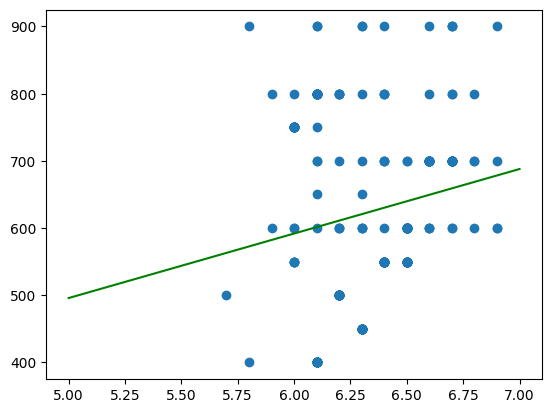

In [63]:
plt.scatter(dataset['Screen Size (inches)'], dataset['Price ($)'])
plt.plot(list(range(5, 8)), [w * x + b for x in range(5,8)], color = 'green')
plt.show()